In [115]:
# coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd


In [119]:
data = pd.read_csv("bjweather/data.csv")
# 把年月日拆成新的3列数据，方便后续处理和绘图 
data['yyyy'] = data['date'].apply(lambda x : x.split("-")[0])
data['mm'] = data['date'].apply(lambda x : x.split("-")[1])
data['dd'] = data['date'].apply(lambda x : x.split("-")[2])


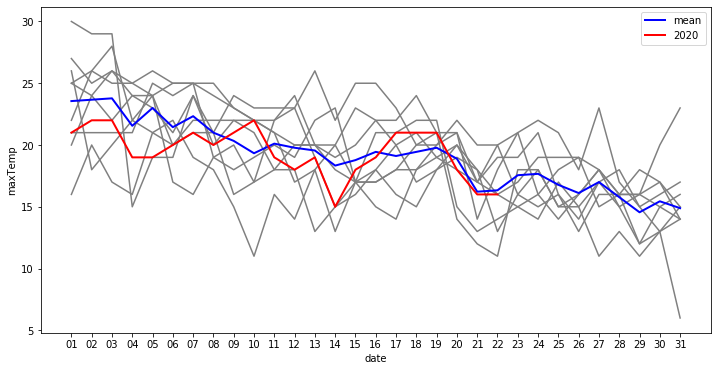

In [122]:
plt.figure(figsize=(12, 6))
plt.xlabel('date')
plt.ylabel('maxTemp')
for year in range(2011, 2020):
    curData = data[(data['yyyy'] == str(year)) & (data['mm'] == '10')]
    plt.plot(curData['dd'], curData['maxT'], color='gray')
# 求2020之前数据的均值 
meanData = data[(data['mm'] == '10') & (data['yyyy'] < '2020')].groupby('dd').mean()
meanData['maxT'].head()
plt.plot(meanData['maxT'], linewidth=2.0, color='blue', label='mean')
# 绘制2020年10月的数据
year20 = data[(data['yyyy'] == '2020') & (data['mm'] == '10')]
plt.plot(year20['dd'], year20['maxT'], linewidth=2.0, color='red', label='2020')
plt.legend()
plt.show()

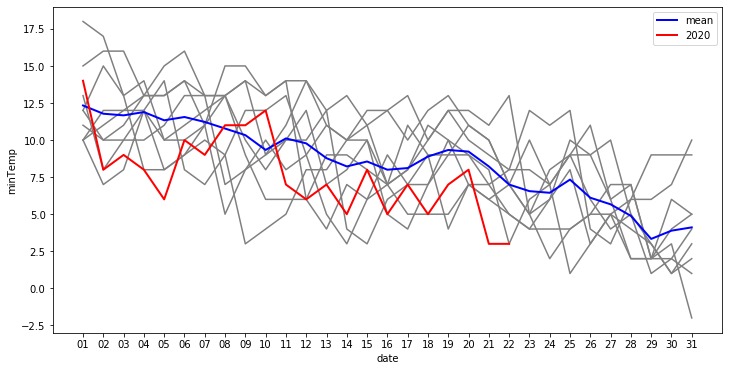

In [123]:
# 和上面一样，只是这里绘制最低温度的数据 
plt.figure(figsize=(12, 6))
plt.xlabel('date')
plt.ylabel('minTemp')
for year in range(2011, 2020):
    curData = data[(data['yyyy'] == str(year)) & (data['mm'] == '10')]
    plt.plot(curData['dd'], curData['minT'], color='gray')

meanData = data[(data['mm'] == '10') & (data['yyyy'] < '2020')].groupby('dd').mean()
plt.plot(meanData['minT'], linewidth=2.0, color='blue', label='mean')

year20 = data[(data['yyyy'] == '2020') & (data['mm'] == '10')]
plt.plot(year20['dd'], year20['minT'], linewidth=2.0, color='red', label='2020')
plt.legend()
plt.show()